<a href="https://colab.research.google.com/github/amartinez-se/03MIAR---Algoritmos-de-Optimizacion-2025/blob/main/03MIAR_AG3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#AG3 - Actividad Guiada 3
Nombre: Asier Martínez <br>
Link:   https://colab.research.google.com/github/amartinez-se/03MIAR---Algoritmos-de-Optimizacion-2025/blob/main/03MIAR_AG3.ipynb<br>
Github: https://github.com/amartinez-se/03MIAR---Algoritmos-de-Optimizacion-2025
<br>


#Carga de librerias

In [24]:
!pip install requests
!pip install tabulate>=0.9 networkx>=3.0
!pip install tsplib95 --no-deps
!pip install deprecated

In [25]:
!pip install deprecated

#Carga de los datos del problema

In [26]:

import urllib.request # Hacer llamadas http a paginas de la red
import tsplib95       # Modulo para las instancias del problema del TSP
import math           # Modulo de funciones matematicas. Se usa para exp
import random         # Para generar valores aleatorios


# Descargamos el fichero de datos(Matriz de distancias)
file = "swiss42.tsp" ;
# urllib.request.urlretrieve("https://raw.githubusercontent.com/mastqe/tsplib/refs/heads/master/swiss42.tsp", file + '.gz')
urllib.request.urlretrieve("https://raw.githubusercontent.com/mastqe/tsplib/refs/heads/master/swiss42.tsp", file  )
# !gzip -d swiss42.tsp.gz     #Descomprimir el fichero de datos

# Coordendas 51-city problem (Christofides/Eilon)
# file = "eil51.tsp" ; urllib.request.urlretrieve("http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/tsp/eil51.tsp.gz", file)

# Coordenadas - 48 capitals of the US (Padberg/Rinaldi)
# file = "att48.tsp" ; urllib.request.urlretrieve("http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/tsp/att48.tsp.gz", file)


# http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95
# Documentacion :
  # http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/tsp95.pdf
  # https://tsplib95.readthedocs.io/en/stable/pages/usage.html
  # https://tsplib95.readthedocs.io/en/v0.6.1/modules.html
  # https://pypi.org/project/tsplib95/




('swiss42.tsp', <http.client.HTTPMessage at 0x7ee1d6322540>)

In [27]:
# Carga de datos y generación de objeto problem
###############################################################################
problem = tsplib95.load(file)

# Nodos
Nodos = list(problem.get_nodes())

# Aristas
Aristas = list(problem.get_edges())



In [ ]:
Nodos

In [ ]:
Aristas
# https://github.com/mastqe/tsplib/blob/master/swiss42.tsp


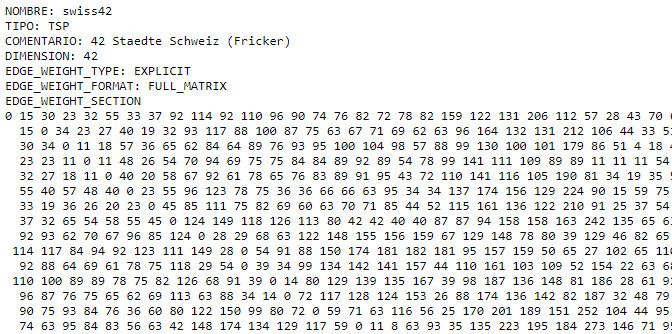

In [30]:
#Probamos algunas funciones del objeto problem

#Distancia entre nodos
problem.get_weight(3, 0)

#Todas las funciones
#Documentación: https://tsplib95.readthedocs.io/en/v0.6.1/modules.html

#dir(problem)

23

#Funcionas basicas


In [ ]:

# Funcionas basicas
###############################################################################

# Se genera una solucion aleatoria con comienzo en en el nodo 0
def crear_solucion(Nodos):
  solucion = [Nodos[0]]
  for n in Nodos[1:]:
    solucion = solucion + [random.choice(list(set(Nodos) - set({Nodos[0]}) - set(solucion)))]
  return solucion

# Devuelve la distancia entre dos nodos
def distancia(a,b, problem):
  return problem.get_weight(a,b)

# Devuelve la distancia total de una trayectoria/solucion
def distancia_total(solucion, problem):
  distancia_total = 0
  for i in range(len(solucion)-1):
    distancia_total += distancia(solucion[i] ,solucion[i+1] ,  problem)
  return distancia_total + distancia(solucion[len(solucion)-1] ,solucion[0], problem)

sol_temporal = crear_solucion(Nodos)


print(sol_temporal   )
print(distancia_total(sol_temporal, problem))

[0, 18, 29, 14, 15, 23, 22, 4, 26, 24, 13, 11, 10, 39, 28, 6, 20, 19, 16, 36, 41, 30, 7, 12, 5, 40, 9, 31, 37, 32, 1, 38, 35, 27, 33, 3, 25, 17, 8, 2, 21, 34]
4826


# 1. BUSQUEDA ALEATORIA
---

In [ ]:
###############################################################################
# BUSQUEDA ALEATORIA
###############################################################################

def busqueda_aleatoria(problem, it):
  # N es el numero de iteraciones
  Nodos = list(problem.get_nodes())

  mejor_solucion = []
  # mejor_distancia = 10e100                        # Inicializamos con un valor alto
  mejor_distancia = float('inf')                    # Inicializamos con un valor alto

  for i in range(it):                                # Criterio de parada: repetir N veces pero podemos incluir otros
    solucion = crear_solucion(Nodos)                # Genera una solucion aleatoria
    distancia = distancia_total(solucion, problem)  # Calcula el valor objetivo(distancia total)

    if distancia < mejor_distancia:                 # Compara con la mejor obtenida hasta ahora
      mejor_solucion = solucion
      mejor_distancia = distancia


  print("Mejor solución:" , mejor_solucion)
  print("Distancia     :" , mejor_distancia)
  return mejor_solucion


# Busqueda aleatoria con 5000 iteraciones
solucion = busqueda_aleatoria(problem, 5000)

Mejor solución: [0, 31, 8, 20, 1, 3, 36, 22, 24, 39, 21, 7, 25, 12, 19, 27, 4, 41, 28, 17, 10, 29, 23, 18, 26, 5, 37, 32, 34, 33, 30, 38, 40, 11, 14, 16, 15, 6, 35, 2, 13, 9]
Distancia     : 3897


#2. BUSQUEDA LOCAL
---

In [ ]:
###############################################################################
# BUSQUEDA LOCAL(1 paso)
###############################################################################
def genera_vecina(solucion):
  # Generador de soluciones vecinas: 2-opt (intercambiar 2 nodos) Si hay N nodos se generan (N-1)x(N-2)/2 soluciones
  # Se puede modificar para aplicar otros generadores distintos que 2-opt
  # print(solucion)
  mejor_solucion = []
  mejor_distancia = 10e100
  for i in range(1,len(solucion)-1):          # Recorremos todos los nodos en bucle doble para evaluar todos los intercambios 2-opt
    for j in range(i+1, len(solucion)):

      # Se genera una nueva solución intercambiando los dos nodos i,j:
      # (usamos el operador + que para listas en python las concatena) : ej.: [1,2] + [3] = [1,2,3]
      vecina = solucion[:i] + [solucion[j]] + solucion[i+1:j] + [solucion[i]] + solucion[j+1:]

      # Se evalua la nueva solución ...
      distancia_vecina = distancia_total(vecina, problem)

      # ... para guardarla si mejora las anteriores
      if distancia_vecina <= mejor_distancia:
        mejor_distancia = distancia_vecina
        mejor_solucion = vecina
  return mejor_solucion


# solucion = [1, 47, 13, 41, 40, 19, 42, 44, 37, 5, 22, 28, 3, 2, 29, 21, 50, 34, 30, 9, 16, 11, 38, 49, 10, 39, 33, 45, 15, 24, 43, 26, 31, 36, 35, 20, 8, 7, 23, 48, 27, 12, 17, 4, 18, 25, 14, 6, 51, 46, 32]
print("Distancia Solucion Incial:" , distancia_total(solucion, problem))


nueva_solucion = genera_vecina(solucion)
print("Distancia Mejor Solucion Local:", distancia_total(nueva_solucion, problem))


Distancia Solucion Incial: 3897
Distancia Mejor Solucion Local: 3514


In [ ]:
# Busqueda Local(iteraciones):
#  - Sobre el operador de vecindad 2-opt(funcion genera_vecina)
#  - Sin criterio de parada, se para cuando no es posible mejorar.
def busqueda_local(solucion, problem):
  mejor_solucion = []

  # Generar una solucion inicial de referencia(aleatoria)
  # solucion_referencia = crear_solucion(Nodos)
  solucion_referencia = solucion
  mejor_distancia = distancia_total(solucion_referencia, problem)

  iteracion=0             # Un contador para saber las iteraciones que hacemos
  while(1):
    iteracion +=1         # Incrementamos el contador
    # print('#',iteracion)

    # Obtenemos la mejor vecina ...
    vecina = genera_vecina(solucion_referencia)

    # ... y la evaluamos para ver si mejoramos respecto a lo encontrado hasta el momento
    distancia_vecina = distancia_total(vecina, problem)

    # Si no mejoramos hay que terminar. Hemos llegado a un minimo local(según nuestro operador de vencindad 2-opt)
    if distancia_vecina < mejor_distancia:
      # mejor_solucion = copy.deepcopy(vecina)   # Con copia profunda. Las copias en python son por referencia
      mejor_solucion = vecina                   # Guarda la mejor solución encontrada
      mejor_distancia = distancia_vecina

    else:
      print("En la iteracion ", iteracion, ", la mejor solución encontrada es:" , mejor_solucion)
      print("Distancia     :" , mejor_distancia)
      return mejor_solucion

    solucion_referencia = vecina


sol = busqueda_local(nueva_solucion, problem )

En la iteracion  29 , la mejor solución encontrada es: [0, 17, 7, 1, 6, 28, 29, 39, 24, 40, 21, 9, 25, 11, 12, 4, 3, 27, 2, 8, 23, 41, 10, 18, 26, 5, 32, 20, 33, 34, 38, 22, 30, 13, 19, 14, 16, 15, 37, 36, 35, 31]
Distancia     : 1798


## 2.1. Búsqueda local con Entornos variables
¿Se puede mejorar con otros operadores de vecindad variables?

El principal problema de la búsqueda local es que no diversifica. Tiende a llegar a un óptimo local sin saber si es el global.

https://en.wikipedia.org/wiki/Variable_neighborhood_search

Por tanto, mediante implementación de vecindad variable (VNS) buscamos ampliar la diversificación. Se pretende llevar a cabo implementando operadores de distinta intensidad e ir cambiando entre ellos (de menor a mayor intensidad) hasta que ninguno consiga mejorar la solución.

1. Intercambio de posiciones de dos ciudades
2. Inserción: quita una ciudad de un lugar y la inserta en otro
3. Inversión: Invierte el orden de un segmento de la ruta

In [36]:
# Busqueda Local(iteraciones):
#  - Sobre el operador de vecindad 2-opt(funcion genera_vecina)
#  - Sin criterio de parada, se para cuando no es posible mejorar.

def intercambio(solucion):
  nueva_solucion = solucion[:] # Copia independiente para no modificar la original
  i, j = random.sample(range(len(solucion)), 2) # Tomar dos números distintos al azar de todas las posiciones posibles
  nueva_solucion[i], nueva_solucion[j] = nueva_solucion[j], nueva_solucion[i] # Intercambiar las ciudades (ciudad en posición i pasa a posición j y viceversa)
  return nueva_solucion

def insercion(solucion):
  nueva_solucion = solucion[:] # Copia independiente para no modificar la original
  i = random.randint(0, len(solucion) - 1) # Toma un índice aleatorio para elegir la ciudad
  ciudad = nueva_solucion.pop(i) # Quita la ciudad de la lista y la guarda por separado en la variable
  j = random.randint(0, len(solucion) - 1) # Toma un índice aleatorio para elegir la posición donde insertaremos la ciudad
  nueva_solucion.insert(j, ciudad) # Inserta la ciudad en la posición j
  return nueva_solucion

def inversion(solucion):
  nueva_solucion = solucion[:] # Copia independiente para no modificar la original
  i, j = sorted(random.sample(range(len(solucion)), 2)) # Tomar dos números distintos al azar de todas las posiciones posibles. Sorted para i<j siempre
  nueva_solucion[i:j] = reversed(nueva_solucion[i:j]) # Sustituye el fragmento escogido al azar por ese mismo fragmento, invertido
  return nueva_solucion

def busqueda_local_vns(solucion, problem, max_iter=100):
  mejor_solucion = solucion
  mejor_distancia = distancia_total(mejor_solucion, problem)

  iteracion = 0 # Un contador para saber las iteraciones que hacemos

  operadores = [intercambio, insercion, inversion]
  k = 0

  while k < len(operadores):
    mejora_encontrada = False

    # Se implementa un rango máximo de iteraciones
    for _ in range(max_iter):
      iteracion +=1

      # Obtenemos la mejor vecina con el operador designado ...
      vecina = operadores[k](mejor_solucion)

      # ... y la evaluamos para ver si mejoramos respecto a lo encontrado hasta el momento
      distancia_vecina = distancia_total(vecina, problem)

      # Si no mejoramos hay que terminar. Hemos llegado a un minimo local(según nuestro operador de vencindad 2-opt)
      if distancia_vecina < mejor_distancia:

        # mejor_solucion = copy.deepcopy(vecina)   # Con copia profunda. Las copias en python son por referencia
        mejor_solucion = vecina                   # Guarda la mejor solución encontrada
        mejor_distancia = distancia_vecina
        mejora_encontrada = True
        k = 0 # Si encontramos una mejora, se reinicia para volver a utilizar el operador de menor intensidad con la nueva solución

    if not mejora_encontrada:
      k += 1 # Si no encontramos mejora, tras el máximo de iteraciones, pasamos al siguiente operador (aumentar intensidad)

  print("En la iteracion ", iteracion, ", la mejor solución encontrada es:" , mejor_solucion)
  print("Distancia     :" , mejor_distancia)

  return mejor_solucion

sol = busqueda_local_vns(nueva_solucion, problem )

En la iteracion  7100 , la mejor solución encontrada es: [36, 17, 31, 32, 0, 1, 6, 4, 3, 7, 37, 15, 16, 14, 19, 5, 13, 26, 18, 12, 11, 25, 10, 41, 23, 9, 29, 8, 2, 27, 28, 30, 39, 21, 40, 24, 22, 38, 34, 33, 20, 35]
Distancia     : 1501


Tras varias pruebas, puedo afirmar que VNS mejora la distancia la gran mayoría de las veces.

# 3. SIMULATED ANNEALING
---

In [104]:
###############################################################################
# SIMULATED ANNEALING
###############################################################################

# Generador de 1 solucion vecina 2-opt 100% aleatoria (intercambiar 2 nodos)
# Mejorable eligiendo otra forma de elegir una vecina.
def genera_vecina_aleatorio(solucion):

  # Se eligen dos nodos aleatoriamente
  i,j = sorted(random.sample( range(1,len(solucion)) , 2))

  # Devuelve una nueva solución pero intercambiando los dos nodos elegidos al azar
  return solucion[:i] + [solucion[j]] + solucion[i+1:j] + [solucion[i]] + solucion[j+1:]


# Funcion de probabilidad para aceptar peores soluciones
def probabilidad(T,d):
  if random.random() <  math.exp( -1*d / T)  :
    return True
  else:
    return False

# Funcion de descenso de temperatura
def bajar_temperatura(T):
  return T*0.99

In [105]:
def recocido_simulado(problem, TEMPERATURA):
  # problem = datos del problema
  # T = Temperatura

  solucion_referencia = crear_solucion(Nodos)
  distancia_referencia = distancia_total(solucion_referencia, problem)

  mejor_solucion = []             # x* del seudocodigo
  mejor_distancia = 10e100        # F* del seudocodigo


  N=0
  while TEMPERATURA > .0001:
    N+=1
    # Genera una solución vecina
    vecina =genera_vecina_aleatorio(solucion_referencia)

    # Calcula su valor(distancia)
    distancia_vecina = distancia_total(vecina, problem)

    # Si es la mejor solución de todas se guarda(siempre!!!)
    if distancia_vecina < mejor_distancia:
        mejor_solucion = vecina
        mejor_distancia = distancia_vecina

    # Si la nueva vecina es mejor se cambia
    # Si es peor se cambia según una probabilidad que depende de T y delta(distancia_referencia - distancia_vecina)
    if distancia_vecina < distancia_referencia or probabilidad(TEMPERATURA, abs(distancia_referencia - distancia_vecina) ) :
      # solucion_referencia = copy.deepcopy(vecina)
      solucion_referencia = vecina
      distancia_referencia = distancia_vecina

    #  Bajamos la temperatura
    TEMPERATURA = bajar_temperatura(TEMPERATURA)

  print("La mejor solución encontrada es " , end="")
  print(mejor_solucion)
  print("con una distancia total de " , end="")
  print(mejor_distancia)
  return mejor_solucion

sol  = recocido_simulado(problem, 10000000)

La mejor solución encontrada es [0, 37, 36, 35, 33, 20, 27, 30, 34, 32, 5, 7, 31, 17, 15, 19, 13, 11, 41, 23, 25, 12, 18, 26, 10, 4, 3, 6, 16, 14, 1, 2, 28, 29, 8, 9, 22, 39, 40, 21, 24, 38]
con una distancia total de 2147


## 3.1. ¿Se puede mejorar con otra elección no tan aleatoria?
Utilizar función genera_vecina_aleatorio()

Se puede mejorar aplicando el cambio sobre ciudades más cercanas. Esto implica elegir la primera ciudad (i) al azar, pero restringir la distancia máxima a la que puede estar la segunda (j). De esta forma, los cambios realizados en la ruta serán ajustes más pequeños y no tienen la posibilidad de cambiarla por completo.

In [106]:
def genera_vecina_aleatorio(solucion):

  # Se eligen un nodo aleatoriamente
  i = random.randint(1, len(solucion) - 3)

  distancia_maxima = 20
  limite_superior = min(i + distancia_maxima, len(solucion) - 1)

  # Elección sesgada de j
  j = random.randint(i + 1, limite_superior)

  nueva_solucion = solucion[:] # Copia para no modificar original

  # Se implementa inversión
  nueva_solucion[i:j] = reversed(nueva_solucion[i:j])
  # nueva_solucion = solucion[:i] + [solucion[j]] + solucion[i+1:j] + [solucion[i]] + solucion[j+1:] # Intercambio

  return nueva_solucion

In [112]:
def recocido_simulado(problem, TEMPERATURA):
  # problem = datos del problema
  # T = Temperatura

  solucion_referencia = crear_solucion(Nodos)
  distancia_referencia = distancia_total(solucion_referencia, problem)

  mejor_solucion = []             # x* del seudocodigo
  mejor_distancia = 10e100        # F* del seudocodigo


  N=0
  while TEMPERATURA > .0001:
    N+=1
    # Genera una solución vecina
    vecina =genera_vecina_aleatorio(solucion_referencia)

    # Calcula su valor(distancia)
    distancia_vecina = distancia_total(vecina, problem)

    # Si es la mejor solución de todas se guarda(siempre!!!)
    if distancia_vecina < mejor_distancia:
        mejor_solucion = vecina
        mejor_distancia = distancia_vecina

    # Si la nueva vecina es mejor se cambia
    # Si es peor se cambia según una probabilidad que depende de T y delta(distancia_referencia - distancia_vecina)
    if distancia_vecina < distancia_referencia or probabilidad(TEMPERATURA, abs(distancia_referencia - distancia_vecina) ) :
      # solucion_referencia = copy.deepcopy(vecina)
      solucion_referencia = vecina
      distancia_referencia = distancia_vecina

    #  Bajamos la temperatura
    TEMPERATURA = bajar_temperatura(TEMPERATURA)

  print("La mejor solución encontrada es " , end="")
  print(mejor_solucion)
  print("con una distancia total de " , end="")
  print(mejor_distancia)
  return mejor_solucion

sol  = recocido_simulado(problem, 10000000)

La mejor solución encontrada es [0, 1, 7, 32, 28, 29, 9, 41, 23, 24, 40, 21, 39, 22, 38, 30, 34, 33, 20, 31, 35, 36, 17, 37, 15, 16, 14, 19, 13, 18, 12, 11, 25, 10, 8, 26, 5, 6, 4, 3, 27, 2]
con una distancia total de 1494


Al ver resultados peores [2200-2400] que el algoritmo original [1800-2000], veo que estaba realizando un **intercambio** entre dos ciudades, lo que a priori rompería el orden que se ha ido construyendo con el recocido.

Se implementa **inversión** tal cual se explica en el ejercicio anterior y mejora el resultado: 1500-1700

#4. Representación en un grafo a partir de la matriz de distancias( Optimización de posiciones usando escalado multidimensional (MDS)



Multidimensional scaling problem(MDS):   https://en.wikipedia.org/wiki/Multidimensional_scaling

In [39]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.manifold import MDS  # Multidimensional Scaling o Escalado Multidimensional

def plot_tsp_solution(distance_matrix, tsp_solution):
    """
    Dibuja el grafo de un TSP con las posiciones calculadas mediante MDS y muestra
    solo las aristas correspondientes a la solución del TSP.

    :param distance_matrix: np.ndarray, matriz de distancias entre nodos
    :param tsp_solution: list, lista de nodos en el orden de la solución del TSP
    """
    # Crear el grafo completo
    G = nx.Graph()
    num_nodes = len(distance_matrix)
    for i in range(num_nodes):
        for j in range(i + 1, num_nodes):
            G.add_edge(i, j, weight=distance_matrix[i][j])

    # Usar MDS para calcular posiciones de los nodos
    mds = MDS(n_components=2, dissimilarity="precomputed", random_state=42)
    positions = mds.fit_transform(distance_matrix)

    # Convertir las posiciones en un diccionario para networkx
    pos = {i: positions[i] for i in range(num_nodes)}

    # Crear un subgrafo con las aristas del camino TSP
    TSP_G = nx.Graph()
    for i in range(len(tsp_solution) - 1):
        u = tsp_solution[i]
        v = tsp_solution[i + 1]
        TSP_G.add_edge(u, v, weight=distance_matrix[u][v])

    # Dibujar el grafo
    plt.figure(figsize=(8, 6))

    # Dibujar nodos
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=500)

    # Dibujar las aristas del camino TSP
    nx.draw_networkx_edges(TSP_G, pos, edge_color='red', width=2)

    # Añadir etiquetas a los nodos y pesos de las aristas
    nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')
    edge_labels = nx.get_edge_attributes(TSP_G, 'weight')
    nx.draw_networkx_edge_labels(TSP_G, pos, edge_labels=edge_labels, font_size=8)

    plt.title("Grafo TSP con solución específica")
    plt.show()


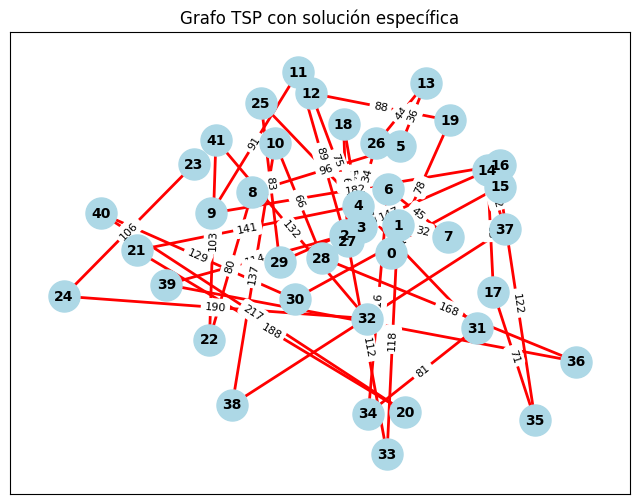

In [40]:
plot_tsp_solution(problem.edge_weights, crear_solucion(Nodos))

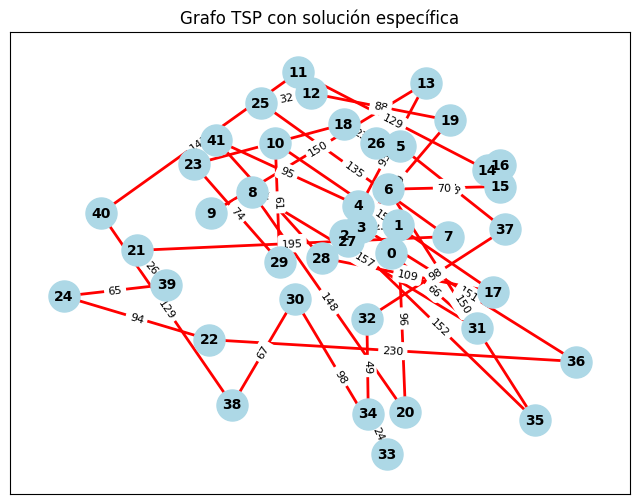

In [41]:
plot_tsp_solution(problem.edge_weights, solucion)